In [5]:
import os
import pathlib
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Import dataset from directory:

In [6]:
dataset_url = r"C:\Users\Purav Parab\Documents\ML\datasets\Animal_images\dataset\dataset"
train_ds = tf.keras.utils.image_dataset_from_directory(
                                                    dataset_url, 
                                                    labels='inferred',
                                                    color_mode='rgb',
                                                    batch_size=32,
                                                    image_size=(224, 224),
                                                    seed=100,
                                                    validation_split=0.2,
                                                    subset="training"
                                                    )
val_ds = tf.keras.utils.image_dataset_from_directory(
                                                    dataset_url, 
                                                    labels='inferred',
                                                    color_mode='rgb',
                                                    batch_size=32,
                                                    image_size=(224, 224),
                                                    seed=100,
                                                    validation_split=0.2,
                                                    subset="validation"
                                                    )

Found 20613 files belonging to 151 classes.
Using 16491 files for training.
Found 20613 files belonging to 151 classes.
Using 4122 files for validation.


Print class names:

In [7]:
class_names = train_ds.class_names
print(class_names)

['acinonyx-jubatus', 'aethia-cristatella', 'agalychnis-callidryas', 'agkistrodon-contortrix', 'ailuropoda-melanoleuca', 'ailurus-fulgens', 'alces-alces', 'anas-platyrhynchos', 'ankylosaurus-magniventris', 'apis-mellifera', 'aptenodytes-forsteri', 'aquila-chrysaetos', 'ara-macao', 'architeuthis-dux', 'ardea-herodias', 'balaenoptera-musculus', 'betta-splendens', 'bison-bison', 'bos-gaurus', 'bos-taurus', 'bradypus-variegatus', 'branta-canadensis', 'canis-lupus', 'canis-lupus-familiaris', 'carcharodon-carcharias', 'cardinalis-cardinalis', 'cathartes-aura', 'centrochelys-sulcata', 'centruroides-vittatus', 'ceratitis-capitata', 'ceratotherium-simum', 'chelonia-mydas', 'chrysemys-picta', 'circus-hudsonius', 'codium-fragile', 'coelacanthiformes', 'colaptes-auratus', 'connochaetes-gnou', 'correlophus-ciliatus', 'crocodylus-niloticus', 'crotalus-atrox', 'crotophaga-sulcirostris', 'cryptoprocta-ferox', 'cyanocitta-cristata', 'danaus-plexippus', 'dasypus-novemcinctus', 'delphinapterus-leucas', 'd

Visualize the data:

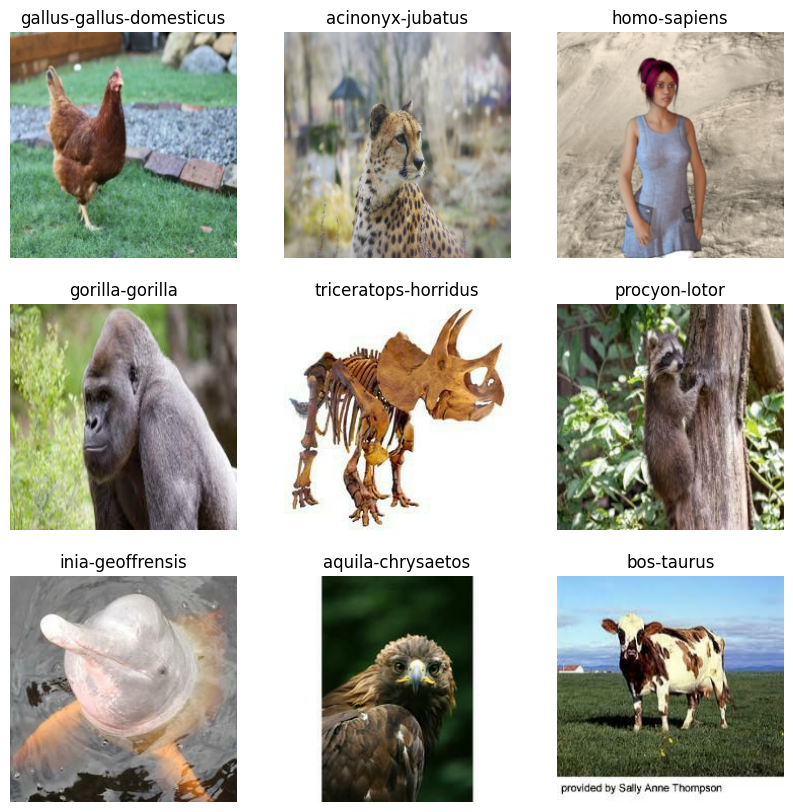

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    print("--")
    for i in range(len(image_batch)):
        print(image_batch[i])
        print("labels")
        print(labels_batch[i])
        print(class_names[labels_batch[i]])
        break
    break    

(32, 224, 224, 3)
(32,)
--
tf.Tensor(
[[[ 46.555805    46.555805    36.555805  ]
  [ 45.66741     45.66741     35.66741   ]
  [ 45.22098     45.22098     35.22098   ]
  ...
  [ 51.295403    49.295403    36.295403  ]
  [ 53.678528    51.678528    38.678528  ]
  [ 59.566895    57.566895    44.566895  ]]

 [[ 46.555805    46.555805    36.555805  ]
  [ 45.66741     45.66741     35.66741   ]
  [ 45.22098     45.22098     35.22098   ]
  ...
  [ 44.986526    42.986526    29.986528  ]
  [ 47.83525     45.83525     32.83525   ]
  [ 53.57716     51.57716     38.57716   ]]

 [[ 46.555805    46.555805    36.555805  ]
  [ 45.66741     45.66741     35.66741   ]
  [ 45.22098     45.22098     35.22098   ]
  ...
  [ 37.275238    35.275238    22.275236  ]
  [ 39.720917    37.720917    24.720917  ]
  [ 45.12868     43.12868     30.128681  ]]

 ...

 [[ 17.109375    12.109375     0.        ]
  [ 28.          22.667412     4.6651783 ]
  [ 18.011162    14.084194     2.970006  ]
  ...
  [119.79664    116.796

Normalize data:

In [10]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_ds))
# first_image = image_batch[0]
# print(np.min(first_image), np.max(first_image))
flatten_layer = tf.keras.layers.Flatten()
flatten_ds = train_ds.map(lambda x, y: (flatten_layer(x), y))

In [11]:
for image_batch, labels_batch in normalized_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    print("--")
    for i in range(len(image_batch)):
        print(image_batch[i])
        print("labels")
        print(labels_batch[i])
        print(class_names[labels_batch[i]])
        break
    break    

(32, 224, 224, 3)
(32,)
--
tf.Tensor(
[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[0.98046225 0.98046225 0.98046225]
  [0.9820257  0.9820257  0.9820257 ]
  [0.9803922  0.9803922  0.9803922 ]
  ...
  [0.99667376 0.99667376 0.99667376]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.9790618  0.9790618  0.9790618 ]

Configure the dataset for performance:

In [12]:
AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Training the model:

Model 1:
Loss: 4.0726
alpha: 0.03

In [13]:
model1 = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(),
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(70, activation='relu'),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(120, activation='relu'),
        tf.keras.layers.Dense(151, activation='linear'),
    ], name = "model_one"
)

Model 2: 
Loss: 4.0738
alpha: 0.03

In [14]:
model2 = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(),
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(151, activation='linear'),
    ], name = "model_two"
)

Model 3:
Loss: 4.4187
alpha: 0.03

In [15]:
model3 = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(),
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(120, activation='relu'),
        tf.keras.layers.Dense(151, activation='linear'),
    ], name = "model_three"
)

CNN_Model 1:
loss: 0.0619

In [16]:
num_classes = len(class_names)
print(num_classes)

model_cnn_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255, input_shape=(224, 224, 3)),
        tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes)
    ], name = "cnn_model_one"
)

151


Model 5:

In [17]:
model = model_cnn_1

In [18]:
# model.compile(
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
#     metrics=['accuracy']
# )

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

Model summary

In [19]:
input_shape = (32, 224, 224, 3)  
model.build(input_shape) 
model.summary()

Model: "cnn_model_one"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)      

In [20]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
516/516 [==============================] - 798s 1s/step - loss: 3.7220 - accuracy: 0.1963 - val_loss: 3.3030 - val_accuracy: 0.2763
Epoch 2/20
516/516 [==============================] - 618s 1s/step - loss: 2.9321 - accuracy: 0.3278 - val_loss: 2.9288 - val_accuracy: 0.3195
Epoch 3/20
516/516 [==============================] - 615s 1s/step - loss: 2.3838 - accuracy: 0.4228 - val_loss: 2.7776 - val_accuracy: 0.3481
Epoch 4/20
516/516 [==============================] - 604s 1s/step - loss: 1.7845 - accuracy: 0.5478 - val_loss: 2.9804 - val_accuracy: 0.3654
Epoch 5/20
516/516 [==============================] - 595s 1s/step - loss: 1.1637 - accuracy: 0.6867 - val_loss: 3.3967 - val_accuracy: 0.3455
Epoch 6/20
516/516 [==============================] - 605s 1s/step - loss: 0.6447 - accuracy: 0.8206 - val_loss: 4.0524 - val_accuracy: 0.3316
Epoch 7/20
516/516 [==============================] - 589s 1s/step - loss: 0.3486 - accuracy: 0.9015 - val_loss: 5.1726 - val_accuracy: 0.3353

Visualize training results

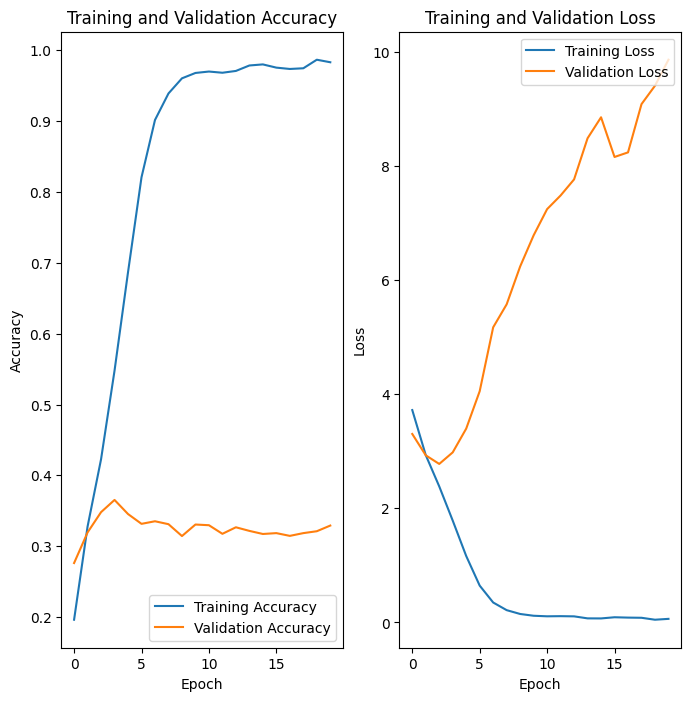

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# Predict on new data:

In [37]:
# Add url of the picture you want to classify
animal_url = r"C:\Users\Purav Parab\Pictures\team hug.jpeg"

img = tf.keras.utils.load_img(
    animal_url, target_size=(224, 224)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

for i in range(len(score)):
    if (100 * score[i]) > 1:
        print(f'score of {class_names[i]} : {100 * score[i]}')

1/1 [==============================] - 0s 18ms/step
This image most likely belongs to acinonyx-jubatus with a 73.13 percent confidence.
score of acinonyx-jubatus : 73.12974548339844
score of panthera-tigris : 26.8701114654541
